In [1]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words("english"))



[nltk_data] Downloading package punkt to /Users/doctor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doctor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/doctor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/doctor/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# from xgboost import XGBClassifier
from wordcloud import WordCloud
from sklearn.svm import SVC
import seaborn as sns


In [3]:
df=pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [4]:
X=df["Text"]
y=df["Category"]
# print(X.sample())
# print(y.sample())


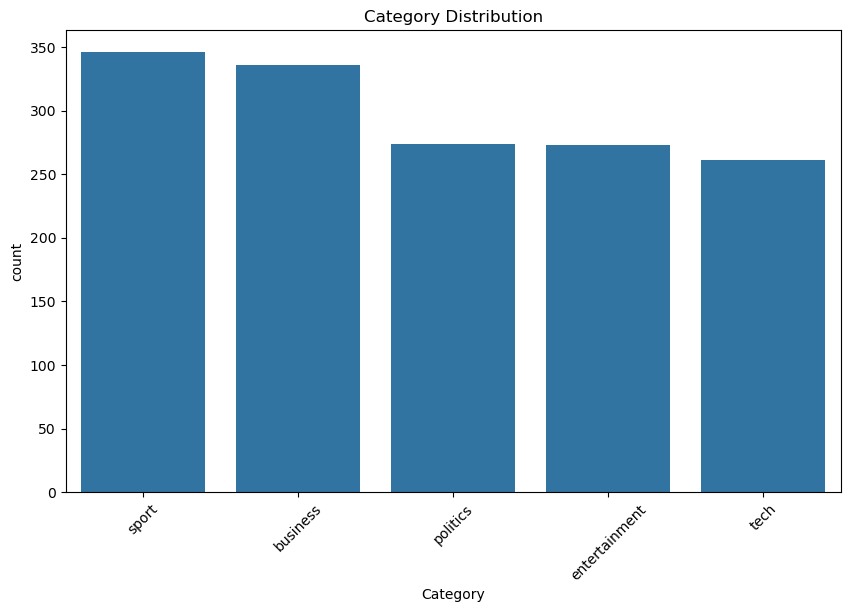

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.show()

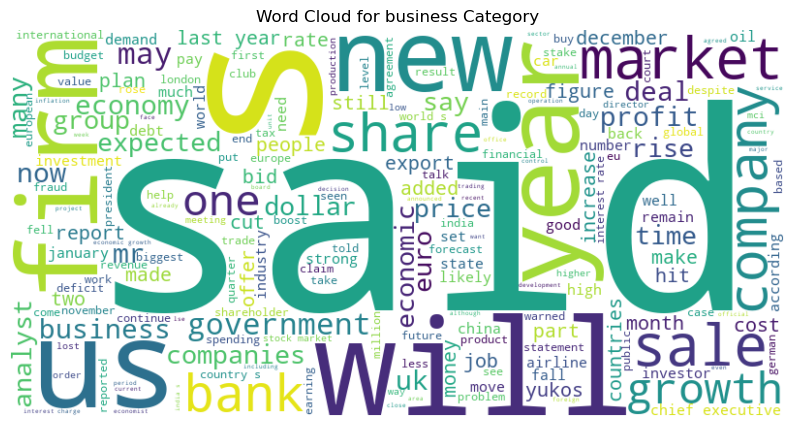

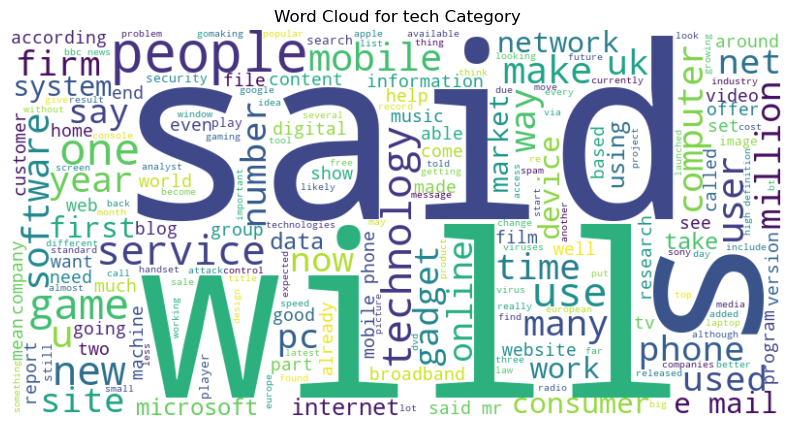

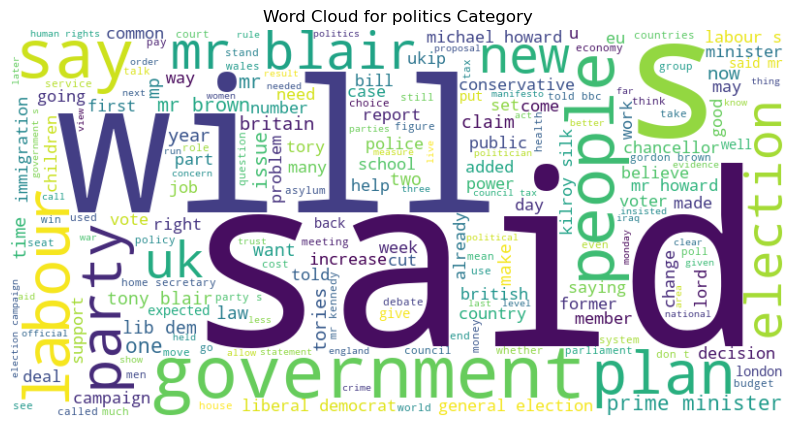

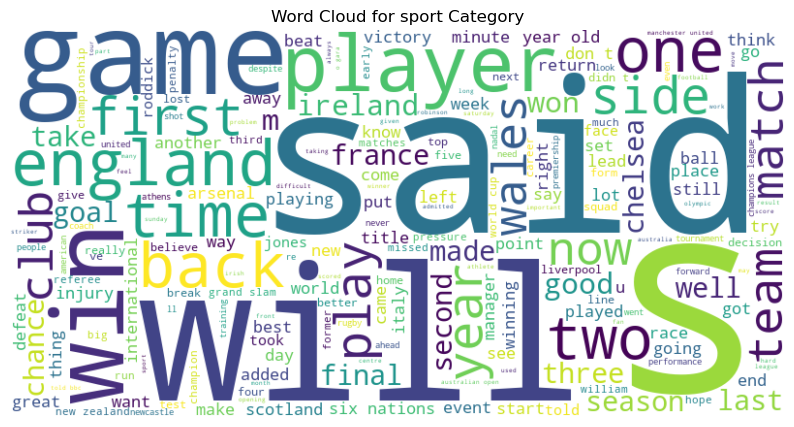

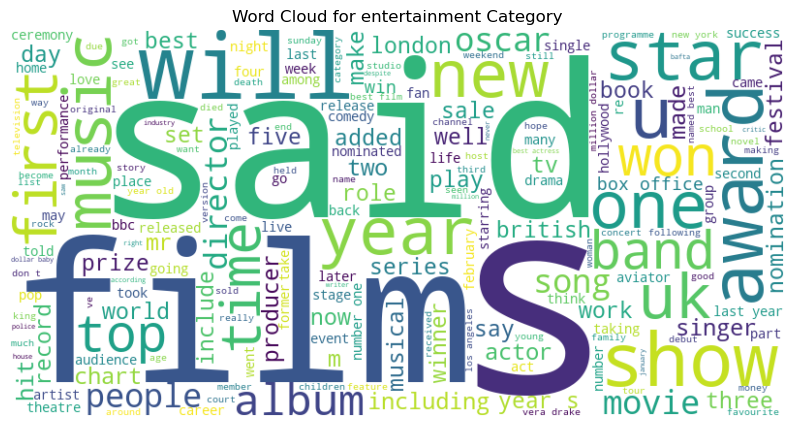

In [6]:
for category in df["Category"].unique():
    text=" ".join(df[df["Category"]==category]["Text"].values)
    wordcloud=WordCloud(
        width=800,
        height=400,
        background_color="white"
    ).generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {category} Category")
    plt.axis('off')
    plt.show()
    

In [8]:
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r'[^a-zA-Z\s]', '', text)
    words=word_tokenize(text)
    words=[lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


print("Hello!!  Welcome to my world@@@, 1234!")
print(preprocess_text("Hello!! Welcome to my world@@@, 1234!"))
    

Hello!!  Welcome to my world@@@, 1234!
hello welcome world


In [9]:
df["Text"]=df['Text'].apply(preprocess_text)

In [ ]:
X_train, X_train, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
y_train

1166            sport
1106         business
538          politics
439             sport
1478         politics
            ...      
1130         politics
1294         business
860          politics
1459    entertainment
1126            sport
Name: Category, Length: 1192, dtype: object

In [ ]:
lr_model=make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression())
lr_model.fit(X_train, y_train)
y_pred_lr=lr_model.predict(X_train)

In [ ]:
print("Accuracy = ", )

In [19]:
new_text =[
    'The latest football match ended in a draw, with great performances from both teams.',
    'The government announced new hydropower policies aimed at reducing carbon footprinting in the parliament  '
]

In [20]:
new_prediction=lr_model.predict(new_text)
for text,prediction in zip(new_text, new_prediction):
    print(f"Text: {text}\nPredicted Category = {prediction}")

Text: The latest football match ended in a draw, with great performances from both teams.
Predicted Category = sport
Text: The government announced new hydropower policies aimed at reducing carbon footprinting in the parliament  
Predicted Category = politics


In [21]:
import joblib
joblib.dump(lr_model, 'lr_model.gz')

['lr_model.gz']